# To do list

[Weather data](#Weather-data)
- [x] 2m_temperature hourly => t_air_i, t_air_24,t_air_min_24, t_air_max_24
- [ ] mean_sea_level_pressure hourly => p_air_i, p_air_24
- [x] 10m_u_component_of_wind, 10m_v_component_of_wind => u_24, u_i
- [x] 2m_dewpoint_temperature => vp_24, vp_i
- surface_pressure hourly(available, not used)

[Solar radiation](#Solar-radiation)
- [ ] surface_solar_radiation_downward_clear_sky => ra_i, ra_24

In [1]:
%run ..\Functions.ipynb

# Test

In [4]:
fh= r"E:\WaPORQA\ERA5\2019-01-01.nc"
ds=xr.open_dataset(fh)
ds

<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 321, time: 24)
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 59.5 59.75 60.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2019-01-01 ... 2019-01-01T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    ssrdc      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-15 21:51:39 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

## Test air pressure

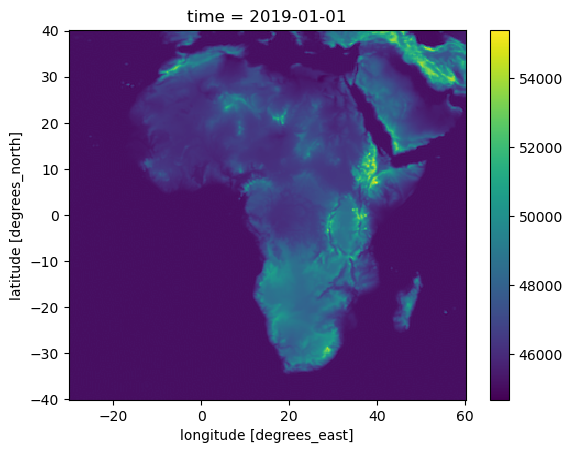

In [21]:
# Reverse  air_pressure function to calculate dem from p_air_0 and p_air
p_air_0=Pa_to_mbar(ds.msl[0])
p_air=Pa_to_mbar(ds.sp[0])
dem0= ((((np.log(p_air/p_air_0)/np.log(c.power))*c.t_ref)-c.t_ref)/c.lapse)+c.z_ref
dem0.plot()

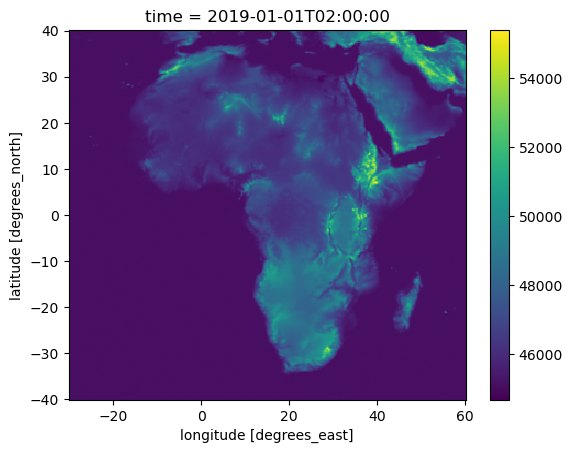

In [22]:
# Reverse  air_pressure function to calculate dem from p_air_0 and p_air
p_air_0=Pa_to_mbar(ds.msl[2])
p_air=Pa_to_mbar(ds.sp[2])
dem= ((((np.log(p_air/p_air_0)/np.log(c.power))*c.t_ref)-c.t_ref)/c.lapse)+c.z_ref
dem.plot()

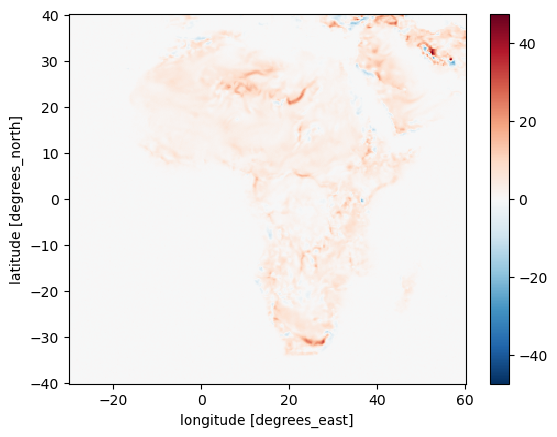

In [23]:
diff=dem-dem0
diff.plot()

**notes**: ERA5 sp does not seem to be calculated from msl and a DEM

## Calculate weather variables

In [24]:
p_air_0 = Pa_to_mbar(ds.msl,attrs={'input':'ERA5 msl'})
# p_air = air_pressure(z, ds.p_air_0, attrs={**p_air_0.attrs,
#                                           'dem':''})
p_air=Pa_to_mbar(ds.sp,  attrs={'input':'ERA5 sp'})
t_dew = kelvin_to_celsius(ds.d2m, attrs={'input': 'ERA5 d2m'})
save_ds = xr.Dataset({'t_air': kelvin_to_celsius(ds.t2m,
                                                attrs={**ds.t2m.attrs, 
                                                       'input':'ERA5 t2m'}
                                                ), 
                      'p_air_0': p_air_0,
                     'p_air': p_air,
                     'u': windspeed_from_components(ds.u10,ds.v10,
                                                    attrs={'input':'ERA5 u10 v10',
                                                          'unit': 'm s-1'}
                                                   ),
                     'vp': vapour_pressure_from_dewpoint(t_dew,
                                                    attrs={'input':'ERA5 d2m'}     
                                                                 ),
                      # 'ra': ds
                     })

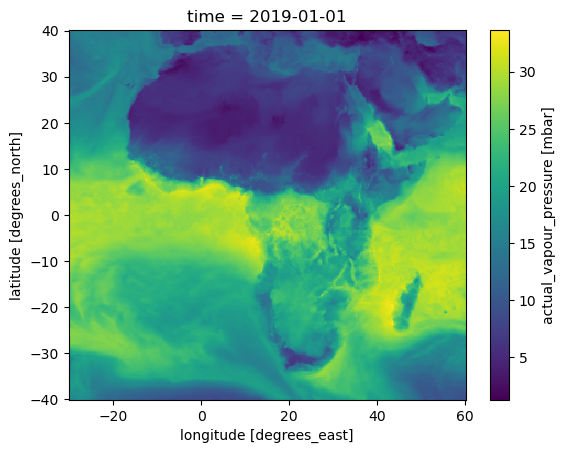

In [27]:
save_ds.vp[0].plot()

In [28]:
save_ds.vp

<xarray.DataArray 'vp' (time: 24, latitude: 321, longitude: 361)>
array([[[13.911039 , 14.166103 , 14.502658 , ...,  6.135253 ,
          6.0083127,  5.904601 ],
        [13.914823 , 14.133136 , 14.334275 , ...,  6.381065 ,
          6.211666 ,  5.992835 ],
        [13.839439 , 14.036933 , 14.235325 , ...,  6.581438 ,
          6.3693004,  6.129018 ],
        ...,
        [17.094986 , 16.898684 , 16.73541  , ...,  9.489176 ,
          9.499428 ,  9.492959 ],
        [17.010992 , 16.787884 , 16.58588  , ...,  9.380751 ,
          9.404809 ,  9.397327 ],
        [16.868227 , 16.659172 , 16.479519 , ...,  9.283464 ,
          9.279756 ,  9.263382 ]],

       [[14.097942 , 14.317252 , 14.625329 , ...,  6.08733  ,
          5.9416065,  5.8056145],
        [14.088787 , 14.271591 , 14.429951 , ...,  6.3662596,
          6.16985  ,  5.910279 ],
        [14.000425 , 14.170715 , 14.2893715, ...,  6.585743 ,
          6.360943 ,  6.063674 ],
...
        [11.134834 , 11.2120695, 11.272832 , ..., 10.53649  ,
         10.489834 , 10.371976 ],
        [10.991557 , 11.054357 , 11.0790615, ..., 10.453947 ,
         10.509898 , 10.399431 ],
        [10.856596 , 10.921753 , 10.973756 , ..., 10.274954 ,
         10.152341 , 10.092385 ]],

       [[17.31983  , 17.230331 , 17.228506 , ...,  6.070943 ,
          5.9248543,  5.7794547],
        [17.513962 , 17.418055 , 17.278671 , ...,  6.436011 ,
          6.2975545,  6.0935273],
        [17.586185 , 17.526896 , 17.410686 , ...,  6.7653   ,
          6.639074 ,  6.4035335],
        ...,
        [11.048795 , 11.119314 , 11.14726  , ..., 10.673915 ,
         10.67991  , 10.668543 ],
        [10.88152  , 10.949873 , 11.00692  , ..., 10.675115 ,
         10.691287 , 10.535305 ],
        [10.770641 , 10.846889 , 10.935193 , ..., 10.481005 ,
         10.345749 , 10.209749 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 59.5 59.75 60.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2019-01-01 ... 2019-01-01T23:00:00
Attributes:
    input:      ERA5 d2m
    long_name:  actual_vapour_pressure
    unit:       mbar
    method:     pywapor.et_look_v2_v3.vapour_pressure_from_dewpoint

## Solar radiation

In [5]:
ds.ssrdc

<xarray.DataArray 'ssrdc' (time: 24, latitude: 321, longitude: 361)>
[2781144 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 59.5 59.75 60.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2019-01-01 ... 2019-01-01T23:00:00
Attributes:
    units:      J m**-2
    long_name:  Surface solar radiation downward clear-sky

In [6]:
ra=ds.ssrdc/3600 #convert hourly J m-2 to W m-2

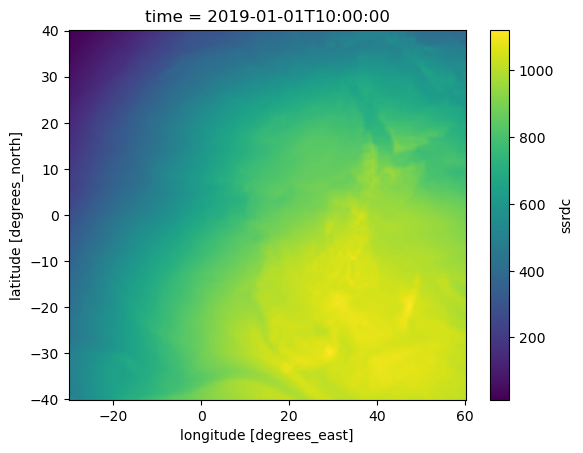

In [8]:
ra[10].plot() #at 10am

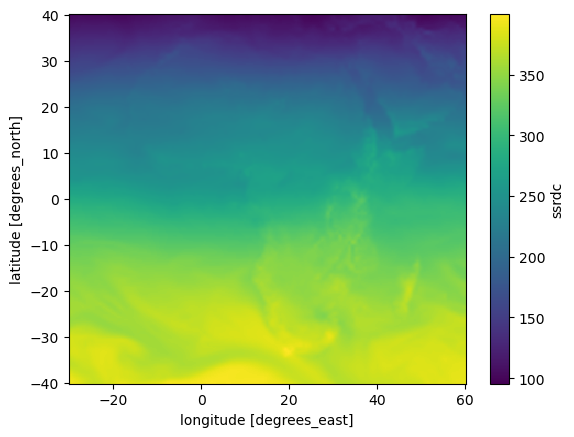

In [10]:
ra_d= ra.mean(dim='time').compute()
ra_d.plot()

Compare with GEOS5, MSG: The range of radiation is good, but the variation is not the same. This is because ERA5 ssrdc is clear-sky, while GEOS5 and MSG is actual radiation (with cloud condition)

GEOS5
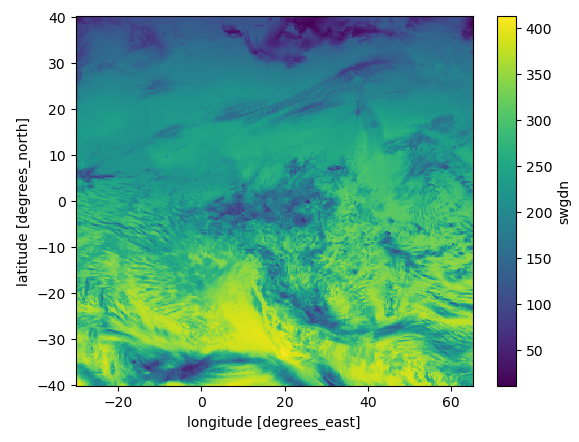

MSG
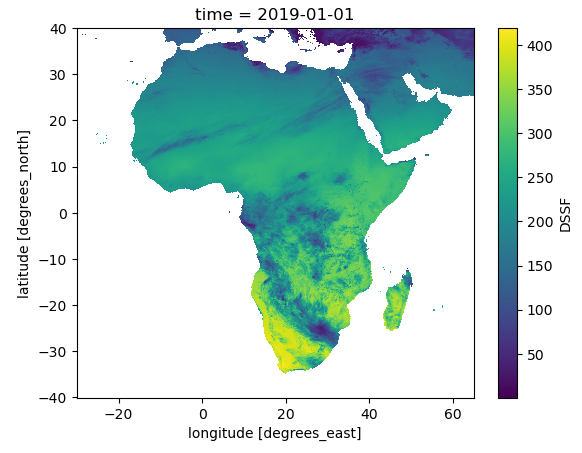

# Preprocessing all files

In [2]:
fhs=glob.glob(r"E:\WaPORQA\ERA5\*.nc")

In [3]:
len(fhs)

1826

In [6]:
# import the datetime module
import datetime

folder=r"E:\WaPORQA\ERA5"
save_folder=r"E:\WaPORQA\ERA5\Processed"
# create a range of dates from 2018-01-01 to 2022-12-31
start_date = datetime.date(2018, 1, 1)
end_date = datetime.date(2022, 12, 31)
date_range = [start_date + datetime.timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# for each date print a string with this format YYYYMMDD
for date in date_range:
    datestr=date.strftime("%Y-%m-%d")
    day_fhs=glob.glob(os.path.join(folder,
                                   '*{0}*.nc'.format(datestr))) 
    ds=xr.open_mfdataset(day_fhs)
    p_air_0 = Pa_to_mbar(ds.msl,attrs={'input':'ERA5 msl'})
    # p_air = air_pressure(z, ds.p_air_0, attrs={**p_air_0.attrs,
    #                                           'dem':''})
    p_air=Pa_to_mbar(ds.sp,  attrs={'input':'ERA5 sp'})
    t_dew = kelvin_to_celsius(ds.d2m, attrs={'input': 'ERA5 d2m'})
    ra_w = J_per_dt_to_W(ds.ssrd, dt=3600, 
                         attrs={'input': 'ERA5 ssrd'})
    save_ds = xr.Dataset({'t_air': kelvin_to_celsius(ds.t2m,
                                                    attrs={**ds.t2m.attrs, 
                                                           'input':'ERA5 t2m'}
                                                    ), 
                          'p_air_0': p_air_0,
                         'p_air': p_air,
                         'u': windspeed_from_components(ds.u10,ds.v10,
                                                        attrs={'input':'ERA5 u10 v10',
                                                              'unit': 'm s-1'}
                                                       ),
                         'vp': vapour_pressure_from_dewpoint(t_dew,
                                                        attrs={'input':'ERA5 d2m'}     
                                                                     ),
                          'ra': ra_w
                         })  
    results = save_ds.compute()
    filepath=os.path.join(save_folder,datestr+"_t-p-u-vp-ra.nc")
    results.to_netcdf(filepath)    

In [7]:
xr.open_dataset(filepath)

<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 321, time: 24)
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 59.5 59.75 60.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2022-12-31 ... 2022-12-31T23:00:00
Data variables:
    t_air      (time, latitude, longitude) float32 ...
    p_air_0    (time, latitude, longitude) float32 ...
    p_air      (time, latitude, longitude) float32 ...
    u          (time, latitude, longitude) float32 ...
    vp         (time, latitude, longitude) float32 ...
    ra         (time, latitude, longitude) float32 ...